# MSE 104L laboratory 1 exercises

*Authors: Enze Chen (University of California, Berkeley)*

```{note}
This is an interactive exercise, so you will want to click the {fa}`rocket` and open the notebook in DataHub (or Colab for non-UCB students).
```

This notebook contains a series of exercises to help you process your data from Lab 1. 
It doesn't answer all of the discussion questions in the lab procedures, but it will help you create a series of figures that can structure the narrative of your lab report.
It will likely lead to a higher grade!

<div class='alert alert-success'>
We tried to stagger the guidance such that each exercise only introduces 1-2 new ideas at a time.
These new ideas are marked with a ⭐.
</div>

## Contents

The exercises in this notebook include:
1. [Visualizing spectra](#Visualizing-an-emission-spectra)
1. [Plotting different filters](#Multiple-spectra---different-filter-elements)
1. [Plotting different thicknesses](#Multiple-spectra---different-filter-thicknesses)
1. [Scatterplots](#Scatterplot-and-line-of-best-fit)

## Import Python packages

It can be pretty helpful to import all required packages at the top of the notebook, which we've done below.
We even changed some of the default settings!

In [1]:
# You can import other packages if you want, but you shouldn't have to.
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize': (5,4),   # You might want to change this to be wider for spectra!! 
    'font.size':         18,
    'lines.linewidth':  2.5,
    'lines.markersize':  10,
    'axes.linewidth':     2,
    'xtick.major.size':   8,
    'xtick.major.width':  2,
    'ytick.major.size':   8,
    'ytick.major.width':  2
})

## Visualizing an emission spectra

[Back to top](#Contents)

Since you went through all that trouble to obtain a Cu emission spectra, let's now plot it!
1. First, you'll want to **upload** the data to this folder in JupyterHub (📁 > `mse104l` > `lab1`).
1. Then you can load it into a NumPy array with [`np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).
1. ⭐ Then plot it with Matplotlib ([`ax.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)).
1. ❗Don't forget styling elements! Here's the character for theta: θ
1. **Download the saved figure** and paste it into your lab writeup.

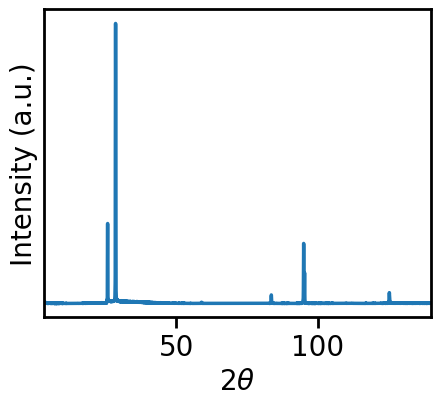

In [5]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #
bare_data = 'my_Cu_file.txt'   # replace this with your file name

Cu_bare = np.loadtxt(bare_data, delimiter=',')

fig, ax = plt.subplots()   # create and style a plot below

plt.show()
fig.savefig('Cu_bare.png', dpi=300, bbox_inches='tight')

### Some thoughts on styling

From our experience:
- It is _almost always_ the case that your fonts (e.g., labels) need to be **larger than you expect**. This is because the figure will be shrunk in your report/poster/etc., but it still needs to be readable.
- Titles are somewhat optional, as they just take up valuable space from your data. Throw the descriptions into your captions.
- Intensities are somewhat arbitrary, so you can give it units of [`(a.u.)`](https://en.wikipedia.org/wiki/Arbitrary_unit) and omit the bulky $y$-ticks/labels by passing `yticks=[]` to `ax.set()`. More space for your data!

## Multiple spectra - different filter elements

[Back to top](#Contents)

Part of the lab asks you to identify the absorption edges of different metal elements used in the filters.
You could just inspect each spectra individually, but it might be more compelling if you compared 1-vs-1 with the bare Cu spectra.
If you want to plot multiple curves on the same axis:

1. Copy the code from above and add another `ax.plot()` call to add a second spectra featuring **one** of the elemental filters.
    - ⭐ We recommend adding labels and a legend to help distinguish them.
    - ⭐ We recommend making the **colors** for each filter consistent; that is, different filters should be represented by different colors. You can choose the color name [from these lists](https://matplotlib.org/stable/gallery/color/named_colors.html) and set it using the `c` parameter: `ax.plot(x, y, c='my_color_name')`.
    - We _do not_ recommend plotting all filters onto the same plot.
1. ⭐ To help reveal the absorption edge, we recommend **changing the scale** on the $y$-axis. You can do so by passing `yscale='value'`, to the `ax.set()` method, where `value` is chosen [from here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html).

In [ ]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


## Multiple spectra - different filter thicknesses

[Back to top](#Contents)

Another part of the lab asks you to observe how the absorption spectra changes with respect to Ni filters of different thicknesses. 
There are **two plots** that are helpful here.

You might want to consider a plot with the bare Cu spectra and the four different Ni spectra on the same plot. 
This allows you to see how the filters progressively change the intensity.
- ⭐ To **zoom in** on the region (peak) of interest, you can change the $x$-axis limits with a `xlim=(start,end)` argument in the `ax.set()` method. 
You have to figure out the appropriate index to capture the interesting behavior.
- ⭐ Make sure you **clearly label** all of your plots and include a legend.
It's handy that Matplotlib automatically cycles through different colors.
- Default linear scaling on the $y$-axis is fine.
- You may want to reset some of your Pyplot settings, depending on what you had set previously.
You can begin the cell below with another `plt.rcParams.update()` call and update `figure.figsize` and `font.size`.

In [ ]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #
plt.rcParams.update({})   # add key:value pairs here


## Scatterplot and line of best fit

[Back to top](#Contents)

The second plot is regarding the mass absorption coefficient, $\mu/\rho$, given by the equation:

$$ I_x = I_0 \exp \left[ -\left( \frac{\mu}{\rho} \right) \rho x \right] $$

where $I_0$ and $I_x$ are the incident and transmitted intensities, respectively, $\rho$ is the density, and $x$ is the distance traveled through the absorbing medium.
You have collected the values of $I_0$ and $I_x$, you've been told $x$, and you can look up tabulated values of $\rho$.
The individual points will have noise, so it's best to compute a line of best fit and then extract the mass absorption coefficient $\mu/\rho$.

Here are some more hints:
- You should probably manually create NumPy arrays for the $x$ values and intensity ratios.
Recall the syntax: `np.array(list_of_values)`.
- ⭐ To take the **natural logarithm** of an array, use [`np.log(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.log.html).
- ⭐ To calculate a **line of best fit**, you can use the [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) command as follows: 
```python
c = np.polyfit(x, y, 1)
```
where `x` and `y` hold your values and `1` specifies a degree 1 polynomial (line).
The resulting slope and $y$-intercept are stored in `c[0]` and `c[1]`, respectively, as `c` is an array containing coefficients in decreasing order of $x$.
- Just as `ax.plot()` is for curves, [`ax.scatter(x, y)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) can be used for individual points.
- ❗Beware of units!

In [ ]:
# -------------   WRITE YOUR CODE IN THE SPACE BELOW   ---------- #


## Conclusion

[Back to top](#Contents)

This concludes the plotting exercises for Lab 1. 
Congratulations! 
We hope you're proud of the plots that you generated and wish you luck with the lab writeup. 📝

Note that the plot for Moseley's relation, while not discussed explicitly, follows the last exercise closely.